Summary
===============

### Topics covered:
- Obtain unbiased estimates of a model's performance
- Diagnose the common problems of machine learning algorithms 
- Fine-tune machine learning models
- Evaluate predictive models using different performance metrics
_______________________________________________

### Streaming workflows with pipelines**
- **The Pipeline Class** in scikit-learn allows us to fit a model including an arbitrary number of transformation steps and appy it to make predictions about new data.
_________________________________________________

### Loading the Breast Cancer Wisconsin dataset
- Contains 569 samples of malignant and benign tumor cells
- First two columns store the unique ID numbers of the samples and the corresponding diagnosis(M=malignant, B=benign), respectively.
- The columns 3-32 contain 30 real-value features that have been computed from digitized images of the cell nuclei, which can be used to build a model to predict whether a tumor is benign or malignant.


In [1]:
# Reading in the dataset directly from the UCI website using pandas:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', 
                 header=None)

In [2]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Assign the 30 features to a Numpy array x. Using labelEncoder,
# transform the class labels from their original string representation
# (M and B) into integers

from sklearn.preprocessing import LabelEncoder
X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)

In [4]:
X[0]

array([  1.79900000e+01,   1.03800000e+01,   1.22800000e+02,
         1.00100000e+03,   1.18400000e-01,   2.77600000e-01,
         3.00100000e-01,   1.47100000e-01,   2.41900000e-01,
         7.87100000e-02,   1.09500000e+00,   9.05300000e-01,
         8.58900000e+00,   1.53400000e+02,   6.39900000e-03,
         4.90400000e-02,   5.37300000e-02,   1.58700000e-02,
         3.00300000e-02,   6.19300000e-03,   2.53800000e+01,
         1.73300000e+01,   1.84600000e+02,   2.01900000e+03,
         1.62200000e-01,   6.65600000e-01,   7.11900000e-01,
         2.65400000e-01,   4.60100000e-01,   1.18900000e-01])

In [5]:
y[0]

1

In [6]:
# After encoding the class labels (diagnosis) in an array y, the malignant
# tumors are now represented as class 1, and the benign tumors are 
# represented as class 0, respectively
le.transform(['M', 'B'])

array([1, 0], dtype=int64)

In [7]:
# Divide the dataset into a separate training dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                   random_state=1)

### Combining transformers and estimators in a pipeline
- Many learning algorithms require input features on the same scale for optimal performance
- We need to standardize the columns in the Breast Cancer Wisconsin dataset before we can feed them to a linear classifier, such as logistic regression
- Assuming that we want to compress our data from the initial 30 dimensions onto a lower 2-dimensional subspace via **Principal Component Analysis(PCA)**. Instead of going through the fitting and transformation steps for the training and test dataset separately, we can chain the **StandardScaler, PCA** and **LogisticRegression** objects in a pipeline


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [9]:
pipe_lr = Pipeline([('scl', StandardScaler()),
                   ('pca', PCA(n_components=2)),
                   ('clf', LogisticRegression(random_state=1))])
pipe_lr.fit(X_train, y_train)
print'Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test)

Test Accuracy: 0.947


- The Pipeline object takes a list of tuples as input
 - first value in each value in each tuple is an arbitrary identifier string that we can use to access the individual elements in the pipeline 
 - second element in every tuple is a scikit-learn transformer or estimator
 
- The intermediate steps in a pipeline constitute scikit-learn transformers
- The last step is an estimator

#### The concept of how pipelines work is summarized in the following figure
![](assets/pipeline.JPG)

### Using k-fold cross-validation to assess model performance
One of the key steps in building a machine learning model is to estimate its performance on data that the model hasn't seen before. To achieve this, we use two techinques:
- **Holdout** cross-validation
- **K-fold** cross-validation

The Holdout method
-------------------

- Split our initial dataset into a separate training and test dataset.
- The former is used for model training, and the latter is used to estimate its  performance.
- However, in a typical ML applications, we are also interested in tuning and comparing different parameter settings to further improve the performance for making predictions on unseen data. This process is calle **model selection**
![](assets/holdout.JPG)

**The disadvantage**
The performance estimate is sensitive to how we partition the training set into the training and validation subsets; the estimate will vary for different samples of data.

K-fold cross-validation
-----------------------
In k-fold cross-validation, we randomly split the training dataset into k folds without replacement, where k-1 folds are used for the model training and one fold is used for testing. This procedure is repeated k times so that we obtain k models and performance estimates.

Since k-fold cross-validation is a resampling technique without replacement, the advantage of this approach is that each sample point will be part of a training and test dataset exactly once, which yields a lower variance estimate of the model performance than the holdout method.

### StratifiedKFold iterator in scikit-learn

In [10]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

In [11]:
kfold = StratifiedKFold(n_splits=10, random_state=1)
kfold.get_n_splits(X, y)
scores = []
print kfold


StratifiedKFold(n_splits=10, random_state=1, shuffle=False)


In [12]:
for train, test in enumerate (kfold.split(X,y)):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    #print 'Fold: %s, Class dist: %s, Acc: %.3f' %(k+1,
                                            #np.bincount(y_train[train]),
                                            #score)

C:\Users\qubit\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\qubit\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\qubit\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single featu

ValueError: bad input shape ()

### Debugging algorithms with learning and validation curves
- Learning curves
- Validations curves

#### Diagnosing bias and variance problems with learning curves


If a model is too complex for a given training dataset-there are too many degrees of freedom or parameters in this model-the model tends to overfit the training data and does not generalize well to unseen data.

By plotting the model training and validation accuracies as functions of the training set size, we can easily detect whether the model suffers from high variance or high bias, and whether the collection of more data could help to address this problem. 
![](assets/biasvariance.jpg)

The graph in the upper-left shows a model with **high bias**. This model has both low training and cross-validation accuracy, which indicates that it underfits the training data.

*Solution:*
- Increase the number of parameters of the model, for example by collecting or constructing additional features, or by decreasing the degree of regularization, for example, in SVM or logistic regression classifiers.


The graph in the upper-right shows a model that suffers from high variance, which is indicated by the large gap between the training and cross validation accuracy. 

*Solution:*
- Collect more training data or
- Reduce the complexity of the model, for example by increasing the regularization parameter
- For unregularized models, it can also help decrease the number of features via feature selection

#### Learning curve function from scikit-learn to evaluate the model


In [13]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


In [14]:
pipe_lr = Pipeline([('scl', StandardScaler()),
                   ('clf', LogisticRegression(penalty='l2', 
                                              random_state=0))])

In [15]:
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes = np.linspace(0.1, 1.0, 10),
                                                       cv = 10,
                                                       n_jobs = 1)

In [16]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

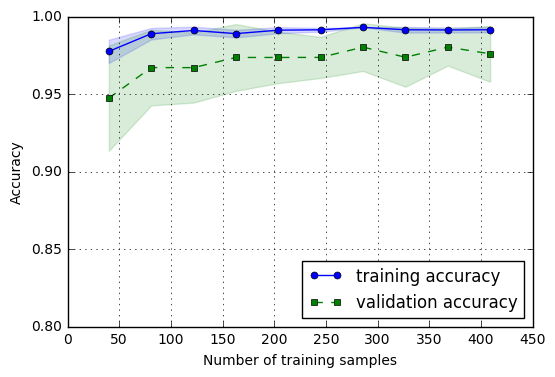

In [17]:
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5,
        label = 'training accuracy')
plt.fill_between(train_sizes,
                  train_mean + train_std,
                  train_mean - train_std, alpha=0.15, color='blue'
                 )
plt.plot(train_sizes, test_mean, color='green', linestyle='--',
        marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, 
                test_mean + test_std,
                test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.show()

Our model performs quite well on the test dataset. However, it may be slighltly overfitting the training data indicated by a relatively small, but visible, gap betweeen the training and cross-validation accuracy curves.



#### Addressing overfitting and underfitting with validation curves
Validation curves are a useful tool for improving the performance of a model by addressing issues such as overfitting or underfitting.

Validation curves are related to learning curves, but instead of plotting the training and test accuracies as functions of the sample size, we vary the values of the model parameters, for example, the inverse regularization parameter c in logistic regression.



In [18]:
from sklearn.model_selection import validation_curve

In [19]:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

train_scores, test_scores = validation_curve(estimator=pipe_lr,
                                              X=X_train,
                                              y=y_train,
                                             param_name = 'clf__C',
                                             param_range=param_range,
                                               cv = 10)

In [20]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

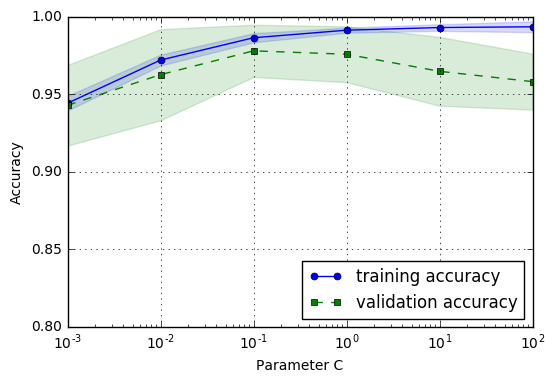

In [21]:
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5,
        label = 'training accuracy')
plt.fill_between(param_range,
                  train_mean + train_std,
                  train_mean - train_std, alpha=0.15, color='blue'
                 )
plt.plot(param_range, test_mean, color='green', linestyle='--',
        marker='s', markersize=5, label='validation accuracy')
plt.fill_between(param_range, 
                test_mean + test_std,
                test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.show()

Although the differences in the accuracy for varying values of C are subtle, we can see that the model slightly underfits the data when we increase the regularization strength(small values of c). However, for large values of c, it means lowering the strength of regularization, so the model tends to slightly overfit the data. In our case, the sweet spot appears to be around c=0.1

### Fine-tuning machine learning models via grid search
In ML, we have two types of parameters:
- Those that are learned from the training data-Example: Weights in logistic regression
- The parameters of a learning algorithm that are optimized separately(Hyperparameters)


**Grid Search** is a powerful hyperparameter optimization technique that can further help to improve the performance of a model by finding the **optimal** combination of hyperparameter values.


The approach of grid search is quite simple, it's a brute force exhaustive search paradigm where we specify a list of values for different hyperparameters, and the computer evaluates the model performance for each combination of those to obtain the optimal set:


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [23]:
pipe_svc = Pipeline([('scl', StandardScaler()),
                     ('clf', SVC(random_state=1))])

In [24]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C': param_range,
               'clf__kernel': ['linear']},
              {'clf__C': param_range,
               'clf__gamma': param_range,
               'clf__kernel': ['rbf']}]

In [25]:
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  n_jobs=-1)

In [26]:
gs = gs.fit(X_train, y_train)

In [27]:
print(gs.best_score_)

0.978021978022


In [28]:
print(gs.best_params_)

{'clf__C': 0.1, 'clf__kernel': 'linear'}


Using the preceding code, we initialized a GridSearchCV object from the
sklearn.grid_search module to train and tune a support vector machine (SVM) pipeline. We set the param_grid parameter of GridSearchCV to a list of dictionaries to specify the parameters that we'd want to tune. For the linear SVM, we only evaluated the inverse regularization parameter C; for the RBF kernel SVM, we tuned both the C and gamma parameter. 

Note that the gamma parameter is specific to kernel SVMs. After we used the training data to perform the grid search, we obtained the score of the best-performing model via the best_score_ attribute and looked at its parameters, that can be accessed via the best_params_ attribute. In this particular case, the linear SVM model with 'clf__C'= 0.1' yielded the best k-fold cross-validation accuracy: 97.8 percent


Time to test our model on the test set:

In [29]:
clf = gs.best_estimator_

In [30]:
clf.fit(X_train, y_train)

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False))])

In [31]:
print('Test accuracy: {:.3f}'.format(clf.score(X_test, y_test)))

Test accuracy: 0.965


Although grid search is a powerful approach for finding the optimal set of parameters, the evaluation of all possible parameter combinations is also computationally very expensive. An alternative approach to sampling different parameter combinations using scikit-learn is randomized search. Using the RandomizedSearchCV class in scikit-learn, we can draw random parameter combinations from sampling distributions with a specified budget. More details and examples for its usage can be found at http://scikit-learn.org/stable/modules/grid_search.html#randomized-parameter-optimization.


### Algorithm selection with nested cross-validation

If we want to select among different machine learning algorithms, another recommended approach is **nested cross-validation**.

In nested cross-validation, we have an outer k-fold cross-validation loop to split the data into training and test folds, and an inner loop is used to select the model using k-fold cross-validation on the training fold. After model selection, the test fold is then used to evaluate the model performance.

![](assets/nested-cv.PNG)
Figure: **5x2 cross-validation**

In [32]:
from sklearn.model_selection import cross_val_score
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  n_jobs=-1)

In [33]:
scores = cross_val_score(gs, X, y, scoring='accuracy', cv=5)
print('CV accuracy: {:.3f} +/- {:.3f}'.format(np.mean(scores), np.std(scores)))

CV accuracy: 0.972 +/- 0.012


The returned average cross-validation accuracy gives us a good estimate of what
to expect if we tune the hyperparameters of a model and then use it on unseen data.
For example, we can use the nested cross-validation approach to compare an
SVM model to a simple decision tree classifier; for simplicity, we will only tune
its depth parameter:

In [34]:
from sklearn.tree import DecisionTreeClassifier
gs = GridSearchCV(
        estimator=DecisionTreeClassifier(random_state=0),
        param_grid=[
              {'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
        scoring='accuracy',
        cv=5)

In [35]:
scores = cross_val_score(gs,
                         X_train, y_train,
                         scoring='accuracy', cv=5)

In [36]:
print('CV accuracy: {:.3f} +/- {:.3f}'.format(np.mean(scores), np.std(scores)))

CV accuracy: 0.908 +/- 0.045


### Looking at different performance evaluation metrics

there are several other performance metrics that can be used to measure a model's relevance, such as:
- precision
- recall
- the F1-score

#### Reading a confusion matrix
A confusion matrix is a matrix that lays out the performance of a learning algorithm. The confusion matrix is simply a square matrix that reports the counts of the true positive, true negative, false positive, and false negative predictions of a classifier, as shown in the following figure:
![](assets/matrix.PNG)

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)

In [39]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [40]:
print(confmat)

[[71  1]
 [ 2 40]]


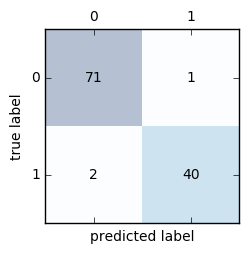

In [41]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
                s=confmat[i, j],
                va='center', ha='center')
        
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

Assuming that class 1 (malignant) is the positive class in this example, our model correctly classified 71 of the samples that belong to class 0 (false negatives) and 40 samples that belong to class 1 (true positives), respectively. However, our model also incorrectly misclassified 2 samples from class 0 as class 1 (false negatives), and it predicted that 1 sample is benign although it is a malignant tumor (false positive).

### Optimizing the precision and recall of a classification model

Both the prediction **error(ERR)** and **accuracy(ACC)** provide general information about how many samples are misclassified. The error can be understood as the sum of all false predictions divided by the number of total predictions, and the accuracy is calculated as the sum of correct predictions divided by the total number of predictions, respectively:

$$ERR = \frac{FP+FN}{FP+FN+TP+TN}$$

$$ACC=\frac{TP+TN}{FP+FN+TP+TN}=1-ERR$$

The **true positive rate(TPR)** and **false positive rate(FPR)** are performance metrics that are especially useful for imbalanced class problems:

$$FPR = \frac{FP}{N}=\frac{FP}{FP+TN}$$
$$TPR = \frac{TP}{P}=\frac{TP}{FN+TP}$$

In tumor diagnosis, for example, we are more concerned about the detection of malignant tumors in order to help a patient with the appropriate treatment. However, it is also important to decrease the number of benign tumors that were incorrectly classified as malignant (false positives) to not unnecessarily concern a patient. In contrast to the FPR, the true positive rate provides useful information about the fraction of positive (or relevant) samples that were correctly identified out of the total pool of positives (P).

**Precision(PRE)** and **recall(REC)** are performance metrics that are related to those true positive and true negative rates, and in fact, recall is synonymous to the true positive rate:

$$PRE=\frac{TP}{TP+FP}$$


$$REC = TPR = \frac{TP}{P}=\frac{TP}{FN+TP}$$

In practice, often a combination of precision and recall is used, the so-called **F1-score**:
$$F_1=2\frac{PRE * REC}{PRE+REC}$$

In [42]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

In [43]:
precision = precision_score(y_true=y_test, y_pred=y_pred)
print('Precision: {:.3f}'.format(precision))

Precision: 0.976


In [44]:
recall = recall_score(y_true=y_test, y_pred=y_pred)
print('Recall: {:.3f}'.format(recall))

Recall: 0.952


In [45]:
f1 = f1_score(y_true=y_test, y_pred=y_pred)
print('F1: {:.3f}'.format(f1))

F1: 0.964


Furthermore, we can use a different scoring metric other than accuracy in GridSearch via the scoring parameter. A complete list of the different values that are accepted by the scoring parameter can be found at http://scikit-learn.org/stable/modules/model_evaluation.html.


**NOTE:** the positive class in scikit-learn is the class that is labeled as class 1. If we want to specify a different positive label, we can construct our own scorer via the make_scorer function, which we can then directly provide as an argument to the scoring parameter in GridSearchCV:
```python
from sklearn.metrics import make_scorer, f1_score
scorer = make_scorer(f1_score, pos_label=0)
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring=scorer,
                  cv=10)
```


### Plotting a receiver operating characteristic

**Receiver operator characteristic (ROC)** graphs are useful tools for selecting models  for classification based on their performance with respect to the false positive and true positive rates, which are computed by shiffting the decision threshold of the classifier. 

The diagonal of an ROC graph can be interpreted as random guessing, and classification models that fall below the diagonal are considered as worse than random guessing. A perfect classifier would fall into the top-left corner of the graph with a true positive rate of 1 and a false positive rate of 0. 

Based on the ROC curve, we can then compute the so-called **area under the curve (AUC)** to characterize the performance of a classification model.


**NOTE:** Similar to ROC curves, we can compute precision-recall curves for the different probability thresholds of a classifier. A function for plotting those precision-recall curves is also implemented in scikit-learn and is documented at http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html.


By executing the following code example, we will plot an ROC curve of a classifier that only uses two features from the Breast Cancer Wisconsin dataset to predict whether a tumor is benign or malignant. Although we are going to use the same logistic regression pipeline that we defined previously, we are making the classification task more challenging for the classifier so that the resulting ROC curve becomes visually more interesting. For similar reasons, we are also reducing the number of folds in the StratifiedKFold validator to three. The code is as follows:



In [46]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

In [47]:
X_train2 = X_train[:, [4, 14]]
cv = StratifiedKFold(n_splits=3)

In [48]:
fig = plt.figure(figsize=(7, 5))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue',
                'darkorange'])

lw = 2
i = 0
all_tpr = []

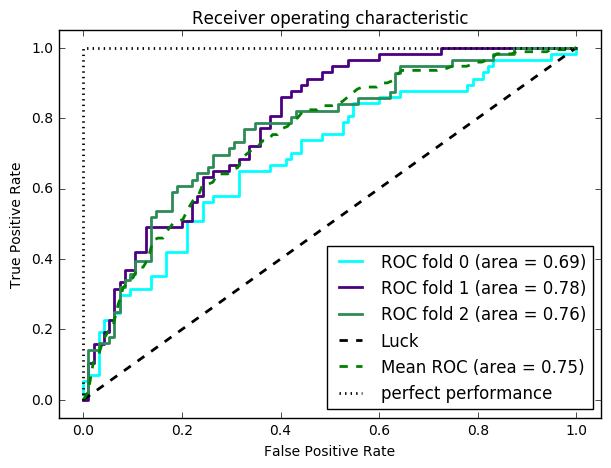

In [49]:
for (train, test), color in zip(cv.split(X_train2, y_train), colors):
    probas_ = pipe_lr.fit(X_train2[train],
                          y_train[train]).predict_proba(X_train2[test])
    
    # Compute ROC curve and area under the curve
    fpr, tpr, thresholds = roc_curve(y_train[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, lw=lw, color=color,
             label='ROC fold {:d} (area = {:.2f})'.format(i, roc_auc))
    i+= 1
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k', label='Luck')

mean_tpr /= cv.get_n_splits(X_train2, y_train)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
         label='Mean ROC (area = {:.2f})'.format(mean_auc), lw=lw)

plt.plot([0, 0, 1], [0, 1, 1],
         lw=2,
         linestyle=':',
         color='black',
         label='perfect performance')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
